Перед запуском программы нужно загрузить в Google Drive по адресу: /content/drive/MyDrive/ два файла - ranf.joblib и mod.pth.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nn1 = 80
nn2 = 108
nn3 = 156
nn4 = 244
nn5 = 319
nn6 = 435
nn7 = 2000
nn8 = 500
nc = 10
bs=64
dev = "cuda"

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X = None

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
rf = joblib.load("/content/drive/MyDrive/ranf.joblib")

In [ ]:
mod = torch.load("/content/drive/MyDrive/mod.pth")

In [ ]:
class FCN(nn.Module):
  def __init__(self):
    super(FCN, self).__init__()
    self.cc1 = nn.Conv2d(1, nn1, 5)
    self.cc2 = nn.Conv2d(nn1, nn2, 5)
    self.cc3 = nn.Conv2d(nn2, nn3, 5)
    self.cc4 = nn.Conv2d(nn3, nn4, 5)
    self.cc5 = nn.Conv2d(nn4, nn5, 3)
    self.cc6 = nn.Conv2d(nn5, nn6, 3)
    self.fc1 = nn.Linear(27840, nn7)
    self.fc2 = nn.Linear(nn7, nn8)
    self.fc3 = nn.Linear(nn8, nc)
  def forward(self, x):
    z1 = F.relu(self.cc1(x))
    z2 = F.relu(self.cc2(z1))
    z3 = F.relu(self.cc3(z2))
    z4 = F.relu(self.cc4(z3))
    z5 = F.relu(self.cc5(z4))
    z6 = F.relu(self.cc6(z5))
    z6 = nn.Flatten()(z6)
    z7 = F.dropout(F.relu(self.fc1(z6)), p=0.005)
    z8 = F.relu(self.fc2(z7))
    z9 = self.fc3(z8)
    return z9

In [ ]:
net = FCN()
net.to(dev)
net.load_state_dict(mod)
mod = None
net.eval()
w = torch.nn.Sequential(net.cc1, nn.ReLU(), net.cc2, nn.ReLU(),  net.cc3, nn.ReLU(),  net.cc4, nn.ReLU(),  net.cc5, nn.ReLU(),  net.cc6, nn.ReLU(), nn.Flatten(), net.fc1, nn.ReLU())

In [ ]:
def pred(X):
  return rf.predict(f(X).to('cpu').detach().numpy())
def f(X):
  return w(torch.Tensor(X).reshape(X.shape[0], 1, 28, 28).to(dev))

In [ ]:
q = pred(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(q, y_test)

0.995

In [ ]:
b = X_test[q!=y_test]
by = y_test[q!=y_test]
bc = q[q!=y_test]

6 1


[]

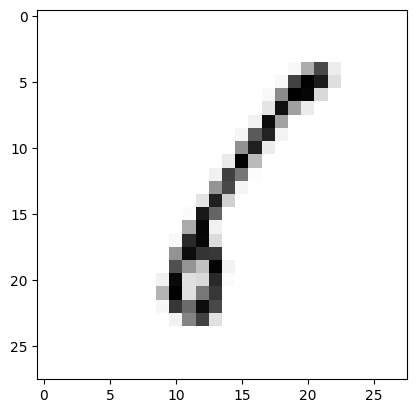

In [ ]:
tt=17
print(by[tt], bc[tt])
plt.imshow(b[tt].reshape(28, 28), cmap='Grays')
plt.plot()